# Using the Wild (LFW) people Data Set

In [1]:
# Load the dataset
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70)

In [2]:
# Display a description of the dataset
print(lfw_people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [3]:
# print the target variables
print(lfw_people.target)

[5 6 3 ... 5 3 5]


In [4]:
# print class labels
import numpy as np


print('Class labels:', np.unique(lfw_people.target))

Class labels: [0 1 2 3 4 5 6]


In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(
                              lfw_people.data,               # features
                              lfw_people.target,             # labels
                              test_size = 0.30,          # split ratio
                              random_state = 1,          # set random seed
                              stratify = lfw_people.target)  # randomize based on labels

In [6]:
print('Labels count in y:', np.bincount(lfw_people.target))
print('Labels count in y_train:', np.bincount(train_labels))
print('Labels count in y_test:', np.bincount(test_labels))

Labels count in y: [ 77 236 121 530 109  71 144]
Labels count in y_train: [ 54 165  84 371  76  50 101]
Labels count in y_test: [ 23  71  37 159  33  21  43]


# No normalization (use raw features)

## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
x = train_set[:,0:2914]      
y = train_labels             
lr = LogisticRegression(C = 100.0, random_state=1, solver='liblinear', multi_class='ovr', max_iter = 3000)
lr.fit(x,y)
y_pred = lr.predict(test_set)
preds = y_pred

In [8]:
import pandas as pd
#---generate table of predictions vs actual---
print("---Confusion Matrix---")
print(pd.crosstab(y_pred, test_labels))

---Confusion Matrix---
col_0   0   1   2    3   4   5   6
row_0                             
0      21   2   2    1   0   0   0
1       1  62   0    5   0   2   0
2       1   3  31    5   2   0   1
3       0   3   4  140   2   5   6
4       0   0   0    3  27   3   1
5       0   0   0    0   0  10   0
6       0   1   0    5   2   1  35


### Metrics

In [9]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_logre_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ' , acc_logre_nonorm)

Accuracy :  0.8423772609819121


In [10]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_logre_nonorm = f1_score(test_labels, preds, average='weighted')
print('F1-Score : ',f1_logre_nonorm)

F1-Score :  0.8401375548438265


In [11]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_logre_nonorm = mean_squared_error(test_labels, preds)
print('Mean Squared Error : ', mse_logre_nonorm)

Mean Squared Error :  0.7467700258397932


In [12]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
y_true = test_labels
y_pred = preds
hamloss_logre_nonorm = hamming_loss(test_labels, preds)
print('Hamming Loss : ' ,hamloss_logre_nonorm)

Hamming Loss :  0.15762273901808785


## Perceptron

In [13]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(train_set, train_labels)

Perceptron(eta0=0.1, random_state=1)

### Model Evaluation

In [14]:
y_pred = ppn.predict(test_set)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 104


### Metrics

In [15]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_perc_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ' , acc_perc_nonorm)

Accuracy :  0.7312661498708011


In [16]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_perc_nonorm = f1_score(test_labels, y_pred, average='weighted')
print('F1-Score : ', f1_perc_nonorm)

F1-Score :  0.7314483755365353


In [17]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_perc_nonorm = mean_squared_error(test_labels, y_pred)
print('Mean Squared error : ', mse_perc_nonorm)

Mean Squared error :  1.4909560723514212


In [18]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_perc_nonorm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ', hamloss_perc_nonorm)

Hamming Loss :  0.268733850129199


##  Support Vector Machines

### With Linear Kernel

In [19]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(train_set, train_labels)

SVC(kernel='linear', random_state=1)

### Model Evaluation

In [20]:
y_pred = svm.predict(test_set)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 64


### Metrics

In [21]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_svm_lk_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ' ,acc_svm_lk_nonorm)

Accuracy :  0.834625322997416


In [22]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_svm_lk_nonorm = f1_score(test_labels, y_pred, average='weighted')
print('F1-Score : ', f1_svm_lk_nonorm)

F1-Score :  0.8357552174888598


In [23]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_svm_lk_nonorm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ', mse_svm_lk_nonorm)

Mean Squared Error :  0.9689922480620154


In [24]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_svm_lk_nonorm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_svm_lk_nonorm)

Hamming Loss :  0.165374677002584


### With RBF Kernel

In [25]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, random_state=1)
svm.fit(train_set, train_labels)

SVC(random_state=1)

### Model Evaluation

In [26]:
y_pred = svm.predict(test_set)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 103


### Metrics

In [27]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_svm_rbf_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_svm_rbf_nonorm)

Accuracy :  0.7338501291989664


In [28]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_svm_rbf_nonorm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_svm_rbf_nonorm)

F1-score : 0.7068337134290631


In [29]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_svm_rbf_nonorm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_svm_rbf_nonorm)

Mean Squared Error :  0.9974160206718347


In [30]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_svm_rbf_nonorm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_svm_rbf_nonorm)

Hamming Loss :  0.2661498708010336


# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Build a decision tree for classification tasks
# citerion:  The function to measure the quality of a split. 
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
#            until all leaves contain less than min_samples_split samples.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf:  The minimum number of samples required to to be at a leaf node.
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
tree_model.fit(train_set, train_labels)

DecisionTreeClassifier(max_depth=4, random_state=1)

### Model Evaluation

In [32]:
y_pred = tree_model.predict(test_set)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 201


### Metrics

In [33]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_dtree_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_dtree_nonorm)

Accuracy :  0.4806201550387597


In [34]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_dtree_nonorm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_dtree_nonorm)

F1-score : 0.38868303244948704


In [35]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_dtree_nonorm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_dtree_nonorm)

Mean Squared Error :  2.310077519379845


In [36]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_dtree_nonorm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_dtree_nonorm)

Hamming Loss :  0.5193798449612403


# Random Forests

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest comprised of 25 decision trees
# citerion:  The function to measure the quality of a split. 
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
#            until all leaves contain less than min_samples_split samples.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf:  The minimum number of samples required to to be at a leaf node.
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=-1)
forest.fit(train_set, train_labels)

RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=1)

### Model Evaluation

In [38]:
y_pred = forest.predict(test_set)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 143


### Metrics

In [39]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_rforest_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_rforest_nonorm)

Accuracy :  0.6304909560723514


In [40]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_rforest_nonorm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_rforest_nonorm)

F1-score : 0.5931310120480279


In [41]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_rforest_nonorm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_rforest_nonorm)

Mean Squared Error :  1.702842377260982


In [42]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_rforest_nonorm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_rforest_nonorm)

Hamming Loss :  0.3695090439276486


# Feed-forward Neural Network with two hidden layers

In [43]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(10,11), alpha = 0.3, max_iter = 1000)

mlp.fit(train_set, train_labels)

MLPClassifier(alpha=0.3, hidden_layer_sizes=(10, 11), max_iter=1000)

### Model Evaluation

In [44]:
y_pred = mlp.predict(test_set)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 228


### Metrics

In [45]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_nnet_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_nnet_nonorm)

Accuracy :  0.4108527131782946


In [46]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_nnet_nonorm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_nnet_nonorm)

F1-score : 0.23928784393900673


In [47]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_nnet_nonorm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_nnet_nonorm)

Mean Squared Error :  2.6666666666666665


In [48]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_nnet_nonorm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_nnet_nonorm)

Hamming Loss :  0.5891472868217055


# Feature Standardization

In [49]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
train_set_std = stdsc.fit_transform(train_set)
test_set_std = stdsc.transform(test_set)

## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
x = train_set_std[:,0:2914]      
y = train_labels             
lr = LogisticRegression(max_iter = 3000)
lr.fit(x,y)
y_pred = lr.predict(test_set_std)
preds = y_pred

### Metrics

In [51]:
import pandas as pd
#---generate table of predictions vs actual---
print("---Confusion Matrix---")
print(pd.crosstab(y_pred, test_labels))

---Confusion Matrix---
col_0   0   1   2    3   4   5   6
row_0                             
0      18   2   3    2   0   0   0
1       3  62   0    6   0   3   1
2       1   2  28    5   0   0   0
3       0   3   5  142   1   4   5
4       0   0   1    1  28   2   2
5       1   0   0    0   0  11   0
6       0   2   0    3   4   1  35


In [52]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_logre_norm = accuracy_score(test_labels, preds)
print('Accuracy : ', acc_logre_norm)

Accuracy :  0.8372093023255814


In [53]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_logre_norm = f1_score(test_labels, preds, average='weighted')
print('F1-Score : ',f1_logre_norm)

F1-Score :  0.8353396006403174


In [54]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_logre_norm = mean_squared_error(test_labels, preds)
print('Mean Squared Error : ', mse_logre_norm)

Mean Squared Error :  0.9198966408268734


In [55]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_logre_norm = hamming_loss(test_labels, preds)
print("Hamming Loss : ", hamloss_logre_norm)

Hamming Loss :  0.16279069767441862


## Perceptron

In [56]:
import numpy as np


print('Class labels:', np.unique(lfw_people.target))

Class labels: [0 1 2 3 4 5 6]


In [57]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(train_set_std, train_labels)

Perceptron(eta0=0.1, random_state=1)

### Model Evaluation

In [58]:
y_pred = ppn.predict(test_set_std)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 79


### Metrics

In [59]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_perc_norm = accuracy_score(test_labels, y_pred)
print('Accuracy : ' ,acc_perc_norm)

Accuracy :  0.7958656330749354


In [60]:
##𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_perc_norm = f1_score(test_labels, y_pred, average='weighted')
print('F1-Score : ' , f1_perc_norm)

F1-Score :  0.79497262699623


In [61]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_perc_norm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_perc_norm)

Mean Squared Error :  1.2196382428940569


In [62]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_perc_norm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ', hamloss_perc_norm)

Hamming Loss :  0.2041343669250646


##  Support Vector Machines

### With Linear Kernel

In [63]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(train_set_std, train_labels)

SVC(kernel='linear', random_state=1)

### Model Evaluation

In [64]:
y_pred = svm.predict(test_set_std)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 69


### Metrics

In [65]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_svm_lk_norm = accuracy_score(test_labels, y_pred)
print('Accuracy : ' ,acc_svm_lk_norm)

Accuracy :  0.8217054263565892


In [66]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_svm_lk_norm = f1_score(test_labels, y_pred, average='weighted')
print('F1-Score : ', f1_svm_lk_norm)

F1-Score :  0.8225132050765303


In [67]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_svm_lk_norm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_svm_lk_norm)

Mean Squared Error :  1.0594315245478036


In [68]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_svm_lk_norm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_svm_lk_norm)

Hamming Loss :  0.17829457364341086


### With RBF Kernel

In [69]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, random_state=1)
svm.fit(train_set_std, train_labels)

SVC(random_state=1)

### Model Evaluation

In [70]:
y_pred = svm.predict(test_set_std)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 98


### Metrics

In [71]:
### Metrics#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_svm_rbf_norm = accuracy_score(test_labels, y_pred)
print('Accuracy : ' ,acc_svm_rbf_norm)

Accuracy :  0.7467700258397932


In [72]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_svm_rbf_norm = f1_score(test_labels, y_pred, average='weighted')
print('F1-Score : ',f1_svm_rbf_norm)

F1-Score :  0.7251566135303762


In [73]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_svm_rbf_norm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_svm_rbf_norm)

Mean Squared Error :  1.0645994832041343


In [74]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_svm_rbf_norm = hamming_loss(test_labels, y_pred)
print('Hamming loss : ',hamloss_svm_rbf_norm)

Hamming loss :  0.2532299741602067


# Decision Tree

In [75]:
# Decision Treefrom sklearn.tree import DecisionTreeClassifier

# Build a decision tree for classification tasks
# citerion:  The function to measure the quality of a split. 
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
#            until all leaves contain less than min_samples_split samples.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf:  The minimum number of samples required to to be at a leaf node.
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
tree_model.fit(train_set_std, train_labels)

DecisionTreeClassifier(max_depth=4, random_state=1)

### Model Evaluation

In [76]:
y_pred = tree_model.predict(test_set_std)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 201


### Metrics

In [77]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_dtree_norm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_dtree_norm)

Accuracy :  0.4806201550387597


In [78]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_dtree_norm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_dtree_norm)

F1-score : 0.38868303244948704


In [79]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_dtree_norm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_dtree_norm)

Mean Squared Error :  2.310077519379845


In [80]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_dtree_norm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_dtree_norm)

Hamming Loss :  0.5193798449612403


# Random Forests

In [81]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest comprised of 25 decision trees
# citerion:  The function to measure the quality of a split. 
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
#            until all leaves contain less than min_samples_split samples.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf:  The minimum number of samples required to to be at a leaf node.
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=-1)
forest.fit(train_set_std, train_labels)

RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=1)

### Model Evaluation

In [82]:
y_pred = y_pred = forest.predict(test_set_std)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 143


### Metrics

In [83]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_rforest_norm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_rforest_norm)

Accuracy :  0.6304909560723514


In [84]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_rforest_norm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_rforest_norm)

F1-score : 0.5931310120480279


In [85]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_rforest_norm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_rforest_norm)

Mean Squared Error :  1.702842377260982


In [86]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_rforest_norm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_rforest_norm)

Hamming Loss :  0.3695090439276486


# Feed-forward Neural Network with two hidden layers

In [87]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(10,11), alpha = 0.3, max_iter = 1000)

mlp.fit(train_set_std, train_labels)

MLPClassifier(alpha=0.3, hidden_layer_sizes=(10, 11), max_iter=1000)

### Model Evaluation

In [88]:
y_pred = mlp.predict(test_set_std)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 97


### Metrics

In [89]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_nnet_norm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_nnet_norm)

Accuracy :  0.7493540051679587


In [90]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_nnet_norm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_nnet_norm)

F1-score : 0.7522841182215406


In [91]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_nnet_norm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_nnet_norm)

Mean Squared Error :  1.7674418604651163


In [92]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_nnet_norm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_nnet_norm)

Hamming Loss :  0.25064599483204136


# Plots

## No Normalazation

### IRIS Classification Accuracy Metrics

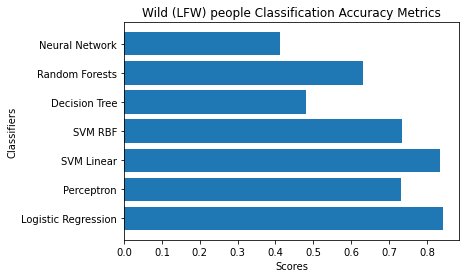

In [93]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [acc_logre_nonorm, acc_perc_nonorm, acc_svm_lk_nonorm, acc_svm_rbf_nonorm, acc_dtree_nonorm, acc_rforest_nonorm, acc_nnet_nonorm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('Wild (LFW) people Classification Accuracy Metrics')
plt.show()


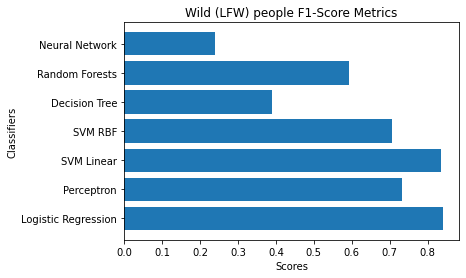

In [94]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [f1_logre_nonorm, f1_perc_nonorm, f1_svm_lk_nonorm, f1_svm_rbf_nonorm, f1_dtree_nonorm, f1_rforest_nonorm, f1_nnet_nonorm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('Wild (LFW) people F1-Score Metrics')
plt.show()


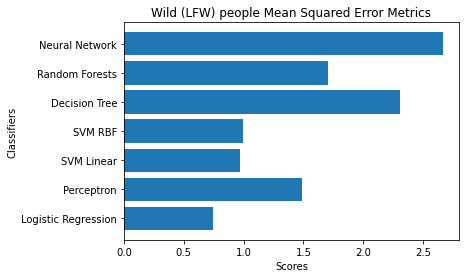

In [95]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [mse_logre_nonorm, mse_perc_nonorm, mse_svm_lk_nonorm, mse_svm_rbf_nonorm, mse_dtree_nonorm, mse_rforest_nonorm, mse_nnet_nonorm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('Wild (LFW) people Mean Squared Error Metrics')
plt.show()

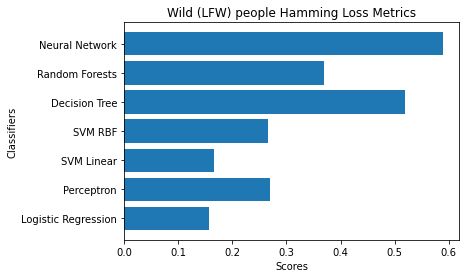

In [96]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [hamloss_logre_nonorm, hamloss_perc_nonorm, hamloss_svm_lk_nonorm, hamloss_svm_rbf_nonorm, hamloss_dtree_nonorm, hamloss_rforest_nonorm, hamloss_nnet_nonorm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('Wild (LFW) people Hamming Loss Metrics')
plt.show()

## Feature Standardization

### IRIS Classification Accuracy Metrics

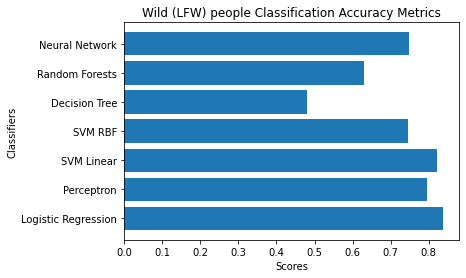

In [97]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [acc_logre_norm, acc_perc_norm, acc_svm_lk_norm, acc_svm_rbf_norm, acc_dtree_norm, acc_rforest_norm, acc_nnet_norm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('Wild (LFW) people Classification Accuracy Metrics')
plt.show()


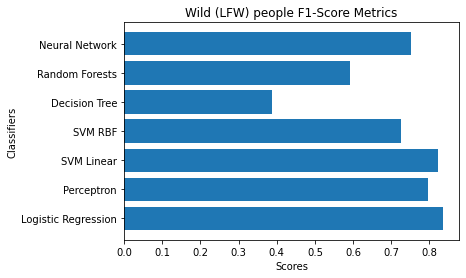

In [98]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [f1_logre_norm, f1_perc_norm, f1_svm_lk_norm, f1_svm_rbf_norm, f1_dtree_norm, f1_rforest_norm, f1_nnet_norm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('Wild (LFW) people F1-Score Metrics')
plt.show()


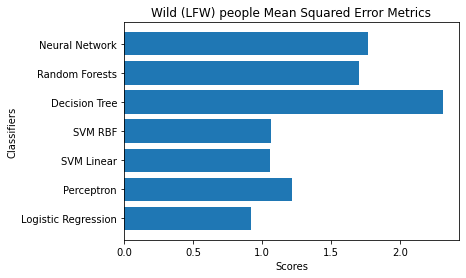

In [99]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [mse_logre_norm, mse_perc_norm, mse_svm_lk_norm, mse_svm_rbf_norm, mse_dtree_norm, mse_rforest_norm, mse_nnet_norm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('Wild (LFW) people Mean Squared Error Metrics')
plt.show()

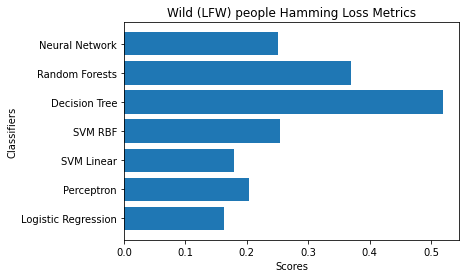

In [100]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [hamloss_logre_norm, hamloss_perc_norm, hamloss_svm_lk_norm, hamloss_svm_rbf_norm, hamloss_dtree_norm, hamloss_rforest_norm, hamloss_nnet_norm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('Wild (LFW) people Hamming Loss Metrics')
plt.show()

# Comparison plots of the classifiers' performance

### (Analysis in Notebook 7)

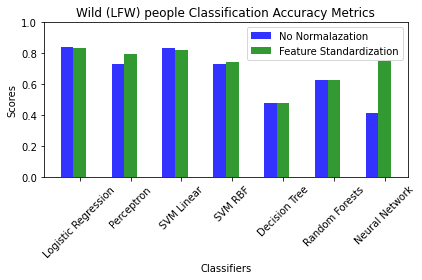

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 7
No_Normalazation = (acc_logre_nonorm, acc_perc_nonorm, acc_svm_lk_nonorm, acc_svm_rbf_nonorm, acc_dtree_nonorm, acc_rforest_nonorm, acc_nnet_nonorm)
Feature_Standardization = (acc_logre_norm, acc_perc_norm, acc_svm_lk_norm, acc_svm_rbf_norm, acc_dtree_norm, acc_rforest_norm, acc_nnet_norm)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
plt.ylim(0.00, 1.0)

rects1 = plt.bar(index, No_Normalazation, bar_width,
alpha=opacity,
color='b',
label='No Normalazation')

rects2 = plt.bar(index + bar_width, Feature_Standardization, bar_width,
alpha=opacity,
color='g',
label='Feature Standardization')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Wild (LFW) people Classification Accuracy Metrics')
plt.xticks(index + bar_width, ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network'), rotation = 45)
plt.legend()

plt.tight_layout()
plt.show()

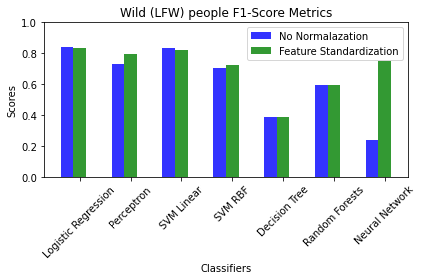

In [102]:
import numpy as np
import matplotlib.pyplot as plt
# data to plot
n_groups = 7
No_Normalazation = (f1_logre_nonorm, f1_perc_nonorm, f1_svm_lk_nonorm, f1_svm_rbf_nonorm, f1_dtree_nonorm, f1_rforest_nonorm, f1_nnet_nonorm)
Feature_Standardization = (f1_logre_norm, f1_perc_norm, f1_svm_lk_norm, f1_svm_rbf_norm, f1_dtree_norm, f1_rforest_norm, f1_nnet_norm)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
plt.ylim(0.00, 1.0)

rects1 = plt.bar(index, No_Normalazation, bar_width,
alpha=opacity,
color='b',
label='No Normalazation')

rects2 = plt.bar(index + bar_width, Feature_Standardization, bar_width,
alpha=opacity,
color='g',
label='Feature Standardization')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Wild (LFW) people F1-Score Metrics')
plt.xticks(index + bar_width, ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network'), rotation = 45)
plt.legend()

plt.tight_layout()
plt.show()

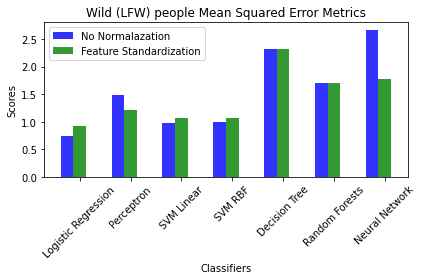

In [103]:
import numpy as np
import matplotlib.pyplot as plt
# data to plot
n_groups = 7
No_Normalazation = (mse_logre_nonorm, mse_perc_nonorm, mse_svm_lk_nonorm, mse_svm_rbf_nonorm, mse_dtree_nonorm, mse_rforest_nonorm, mse_nnet_nonorm)
Feature_Standardization = (mse_logre_norm, mse_perc_norm, mse_svm_lk_norm, mse_svm_rbf_norm, mse_dtree_norm, mse_rforest_norm, mse_nnet_norm)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8


rects1 = plt.bar(index, No_Normalazation, bar_width,
alpha=opacity,
color='b',
label='No Normalazation')

rects2 = plt.bar(index + bar_width, Feature_Standardization, bar_width,
alpha=opacity,
color='g',
label='Feature Standardization')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Wild (LFW) people Mean Squared Error Metrics')
plt.xticks(index + bar_width, ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network'), rotation = 45)
plt.legend()

plt.tight_layout()
plt.show()

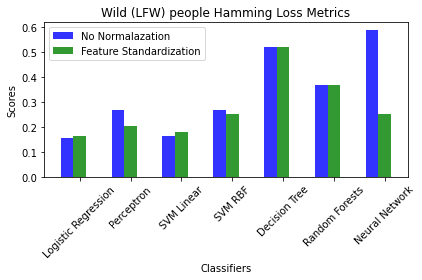

In [104]:
import numpy as np
import matplotlib.pyplot as plt
# data to plot
n_groups = 7
No_Normalazation = (hamloss_logre_nonorm, hamloss_perc_nonorm, hamloss_svm_lk_nonorm, hamloss_svm_rbf_nonorm, hamloss_dtree_nonorm, hamloss_rforest_nonorm, hamloss_nnet_nonorm)
Feature_Standardization = (hamloss_logre_norm, hamloss_perc_norm, hamloss_svm_lk_norm, hamloss_svm_rbf_norm, hamloss_dtree_norm, hamloss_rforest_norm, hamloss_nnet_norm)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8


rects1 = plt.bar(index, No_Normalazation, bar_width,
alpha=opacity,
color='b',
label='No Normalazation')

rects2 = plt.bar(index + bar_width, Feature_Standardization, bar_width,
alpha=opacity,
color='g',
label='Feature Standardization')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Wild (LFW) people Hamming Loss Metrics')
plt.xticks(index + bar_width, ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network'), rotation = 45)
plt.legend()

plt.tight_layout()
plt.show()